In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap
from IPython.display import HTML
from matplotlib.ticker import FuncFormatter
from pylab import rcParams
from matplotlib import animation

%matplotlib inline

#### Read data and sort in order of the date

In [28]:
df = pd.read_csv('crime.csv')
df = df[df.Dispatch_Date != '2016-12-01']
date = pd.to_datetime(df['Dispatch_Date_Time'])
df.sort_values(by='Dispatch_Date_Time', inplace=True)
df.index = np.array(range(df.shape[0]))
date = pd.to_datetime(df['Dispatch_Date_Time'])
df['all_hour'] = abs(date - date[0]).dt.total_seconds() / 3600.0

In [20]:
df.head()

Dc_Dist Psa  Dispatch_Date_Time Dispatch_Date Dispatch_Time  Hour  \
0        3   I 2006-01-01 00:00:00    2006-01-01      00:00:00     0   
1        3   I 2006-01-01 00:02:00    2006-01-01      00:02:00     0   
2       19   R 2006-01-01 00:02:00    2006-01-01      00:02:00     0   
3       18   Q 2006-01-01 00:04:00    2006-01-01      00:04:00     0   
4       12   P 2006-01-01 00:05:00    2006-01-01      00:05:00     0   

         Dc_Key        Location_Block  UCR_General   Text_General_Code  \
0  200603000002    S 8TH ST /SOUTH ST         2600  All Other Offenses   
1  200603000001    S 8TH ST /SOUTH ST         2600  All Other Offenses   
2  200619000047  5500 BLOCK CHERRY ST          800      Other Assaults   
3  200618000007   400 BLOCK S 55TH ST         1500   Weapon Violations   
4  200612000011  1700 BLOCK S 58TH ST         1500   Weapon Violations   

   Police_Districts    Month        Lon        Lat  all_hour  
0                 3  2006-01 -75.155491  39.942416  0.000000  
1                 3  2006-01 -75.155491  39.942416  0.033333  
2                15  2006-01 -75.231975  39.963220  0.033333  
3                14  2006-01 -75.232374  39.953490  0.066667  
4                 9  2006-01 -75.230711  39.937644  0.083333

#### Let's see how many crimes happen each month

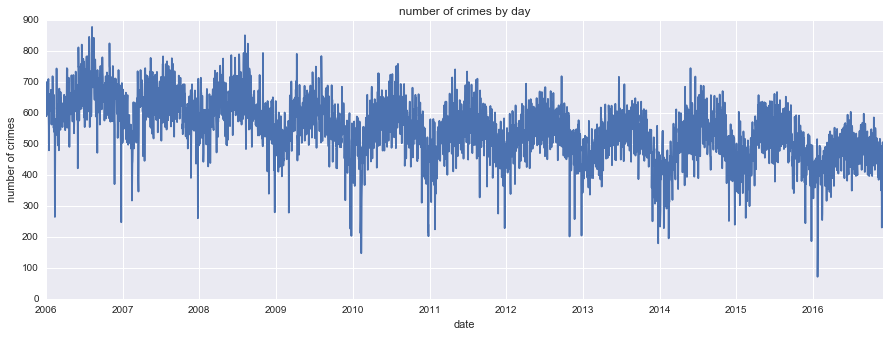

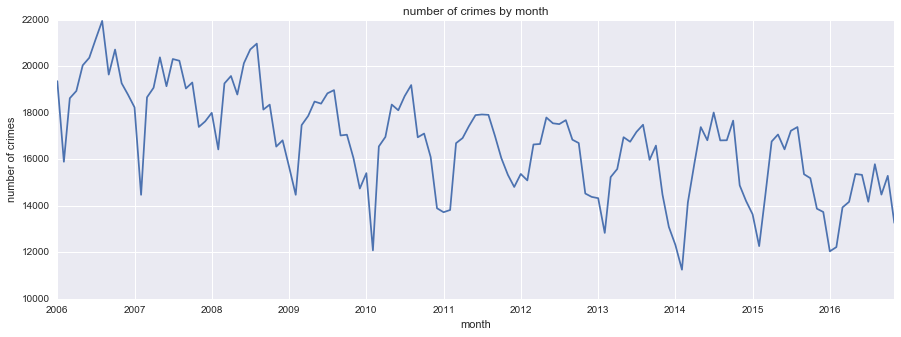

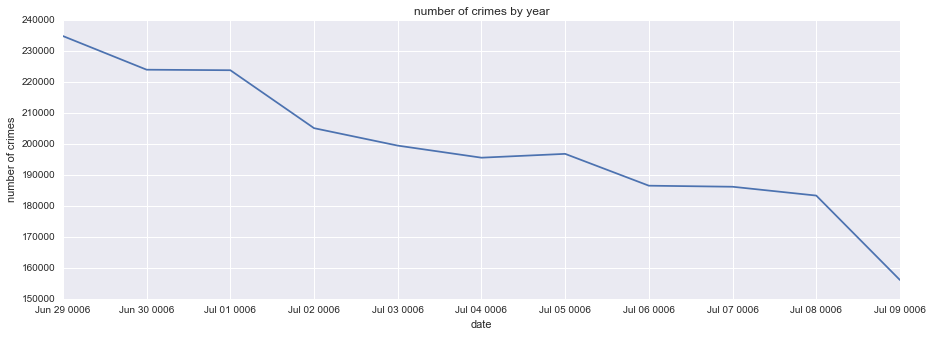

In [40]:
df['month'] = date.dt.month
df['year'] = date.dt.year
df['day'] = date.dt.day
Group = df.groupby(['year', 'month', 'day'])['day'].count()
Count = Group.to_frame(name='count').reset_index()
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(pd.to_datetime(df.Dispatch_Date).unique(), Count['count'], '-')
ax.set_ylabel('number of crimes')
ax.set_xlabel('date')
ax.set_title('number of crimes by day')

Group = df.groupby(['year', 'month'])['month'].count()
Count = Group.to_frame(name='count').reset_index()
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(pd.to_datetime(df.Month).unique(), Count['count'], '-')
ax.set_ylabel('number of crimes')
ax.set_xlabel('month')
ax.set_title('number of crimes by month')

Group = df.groupby(['year'])['year'].count()
Count = Group.to_frame(name='count').reset_index()
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(df.year.unique(), Count['count'], '-')
ax.set_ylabel('number of crimes')
ax.set_xlabel('date')
ax.set_title('number of crimes by year')

On the chart of crimes by day visible seasonality.
From the graph of the crimes by months of visible frequency, in summer, is made considerably more crimes than in the winter.
Looking at the total number of crimes per year from 2006 to 2015, it is clear that the total number of crimes is decreasing every year.

#### Let's see how it changes the total number of crimes per year in each of the Police_Districts 

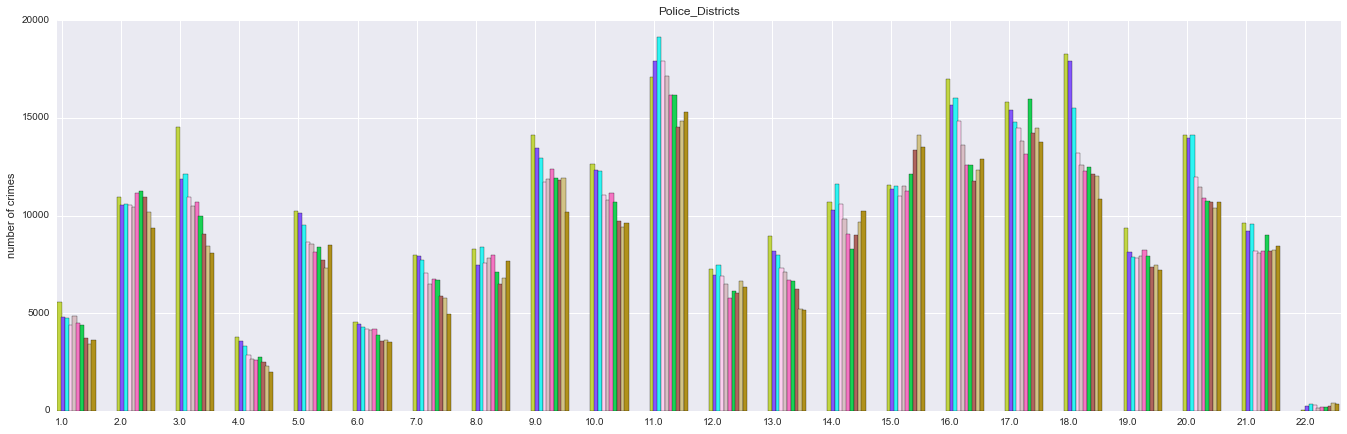

In [41]:
color = np.random.rand(df.Police_Districts.value_counts(sort = False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 23, 7
for i in range(2006, 2016): 
    crimes = np.array(df.Police_Districts[df.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar(ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Police_Districts')
    plt.xticks(ind+width, df.Police_Districts[df.year == 2006].value_counts(sort= False).index)
    plt.axis([0, 26, 0.0, 20000])
    c += 1

plt.show()

#### Let's see how it changes the total number of crimes per year for each Text_General_Code

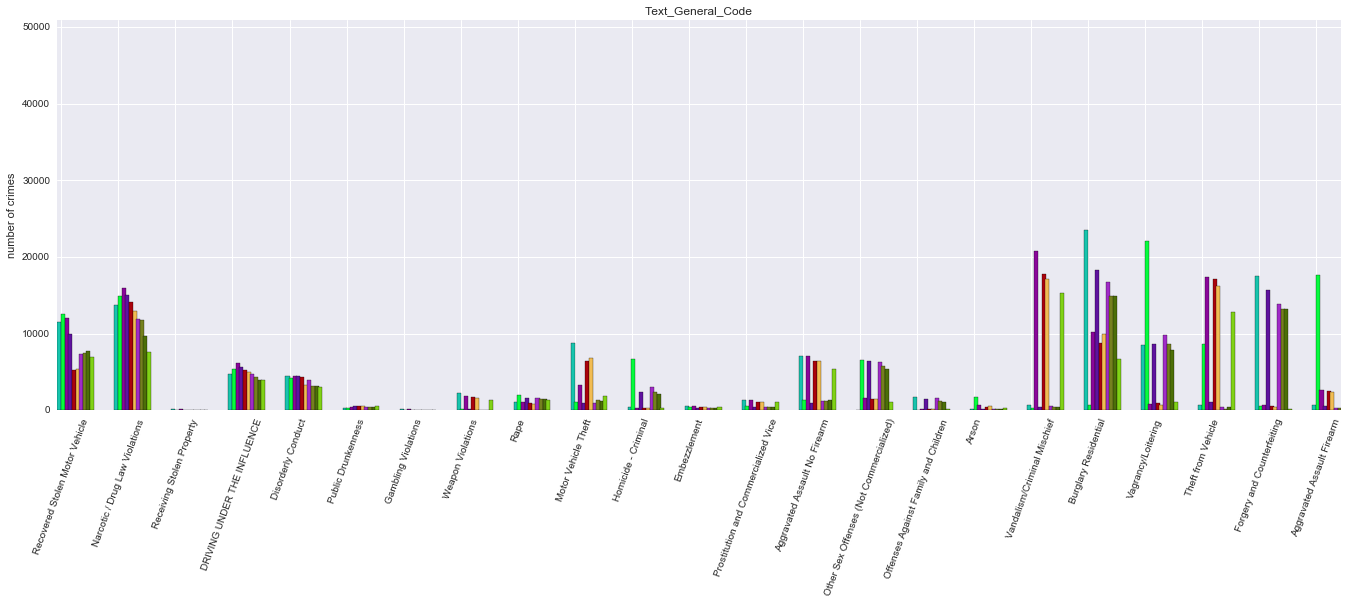

In [44]:
color = np.random.rand(df.Text_General_Code.value_counts(sort= False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 23, 7
fig, ax = plt.subplots()
for i in range(2006, 2016):
    crimes = np.array(df.Text_General_Code[df.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar(ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Text_General_Code')
    plt.xticks(ind+width, df.Text_General_Code[df.year == i].value_counts(sort= False).index, rotation = 70)
    plt.axis([0, 27, 0.0, 51000])
    c += 1

plt.show()


Some Text_General_Code acting weird

#### Let's see how it changes the total number of crimes per year in each month

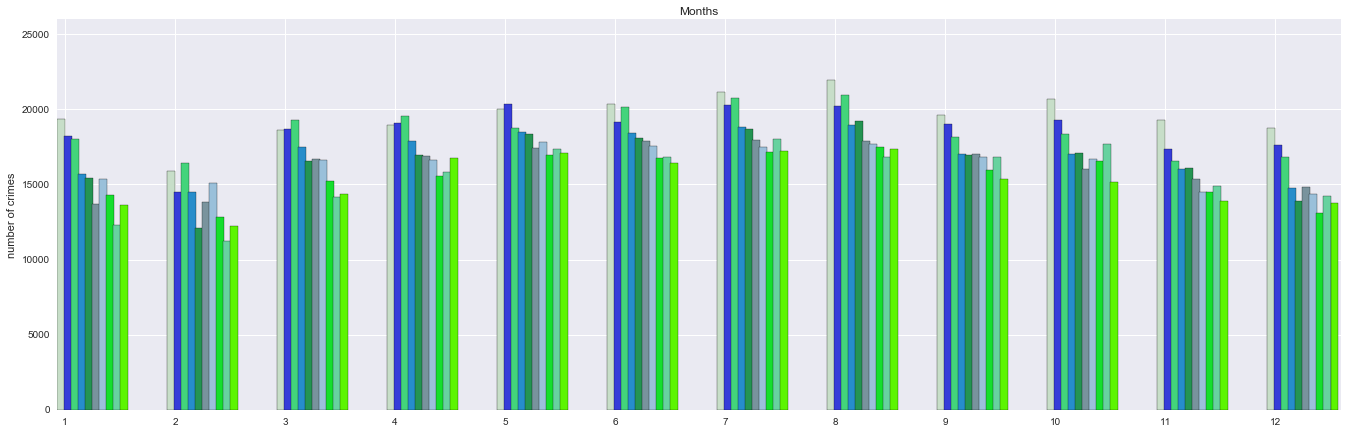

In [49]:
color = np.random.rand(df.month.value_counts(sort= False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 23, 7
fig, ax = plt.subplots()
for i in range(2006, 2016):
    crimes = np.array(df.month[df.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar(ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Months')
    plt.xticks(ind+width, df.month[df.year == i].value_counts(sort= False).index)
    plt.axis([0, 14, 0.0, 26000])
    c += 1

plt.show()


It is seen that in winter there is less crime than in the summer. Every year it becomes less of crimes for each month.

#### Let's see how it changes the total number of crimes per year in each hour.

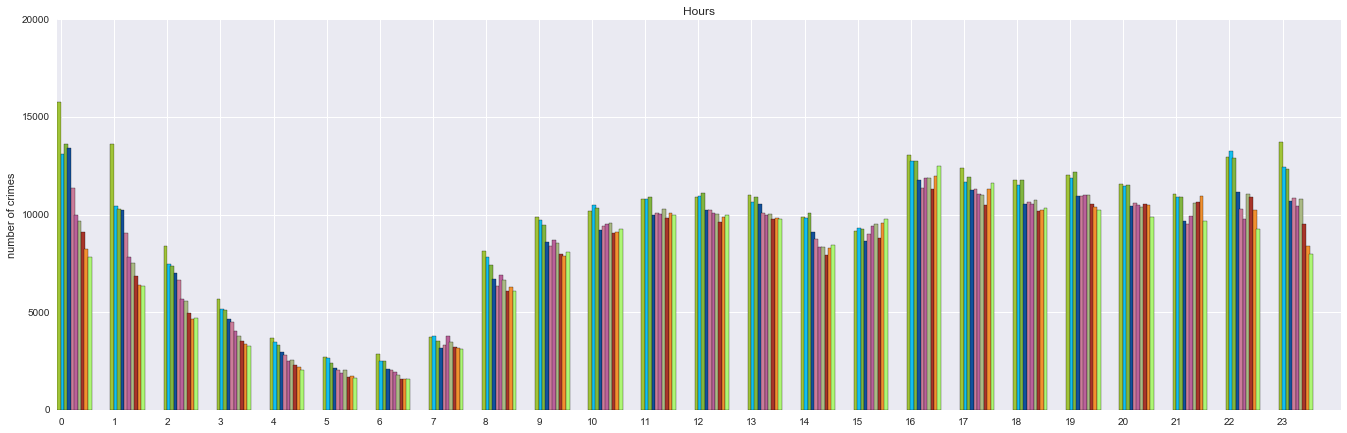

In [50]:
color = np.random.rand(df.Hour.value_counts(sort= False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 23, 7
fig, ax = plt.subplots()
for i in range(2006, 2016):  
    crimes = np.array(df.Hour[df.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar( ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Hours')
    plt.xticks(ind+width, df.Hour[df.year == i].value_counts(sort= False).index)
    plt.axis([0, 29, 0.0, 20000])
    c += 1

plt.show()


#### Let's see how are distributed the crimes on the map.

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=-75.277728,39.869991,-74.957504,40.137895&bboxSR=4269&imageSR=4269&size=3000,2509&dpi=96&format=png32&f=image


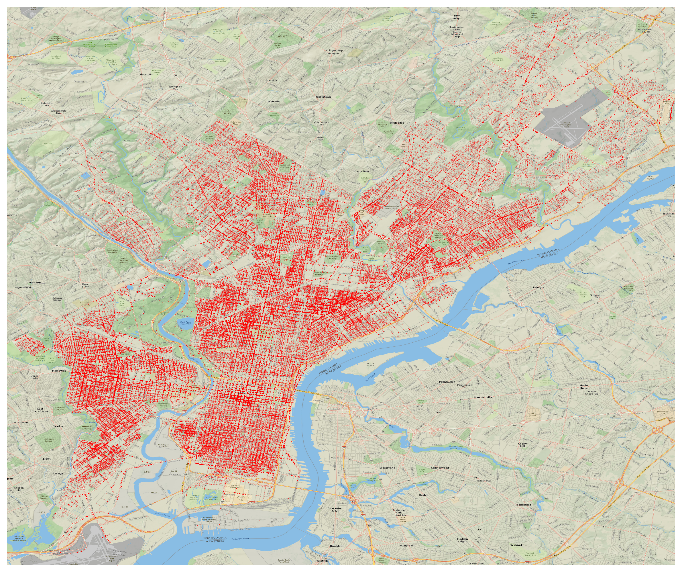

In [48]:
m = Basemap(projection='mill', llcrnrlat=df.Lat.min(), urcrnrlat=df.Lat.max(), 
            llcrnrlon=df.Lon.min(), urcrnrlon=df.Lon.max(), resolution='c', epsg=4269)
x, y = m(tuple(df.Lon[(df.Lon.isnull()==False) & (df.year == 2015)]), \
         tuple(df.Lat[(df.Lat.isnull() == False) & (df.year == 2015)]))

plt.figure(figsize=(20,10))
m.arcgisimage(service="NatGeo_World_Map", xpixels=3000, verbose=True)
m.plot(x,y,'ro',markersize=1, alpha=.3 )

It is seen that in some places the crimes occurred often, some less often.

### Police_Districts

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=-75.277728,39.869991,-74.957504,40.137895&bboxSR=4269&imageSR=4269&size=3000,2509&dpi=96&format=png32&f=image


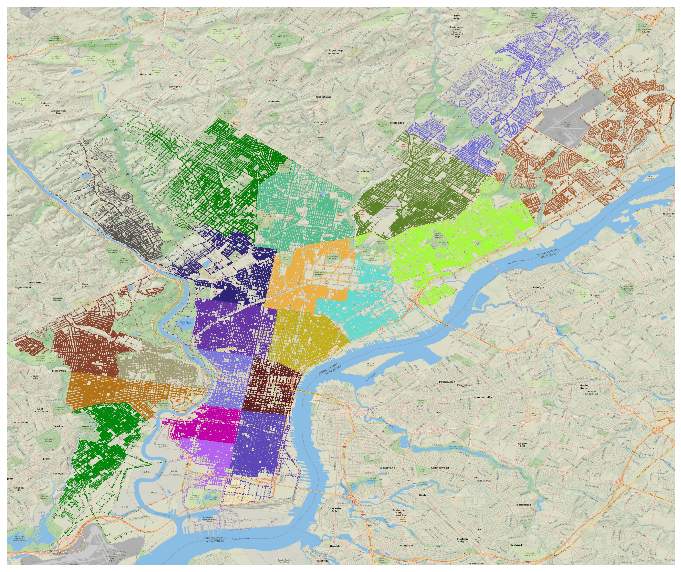

In [55]:
color = np.random.rand(df.Police_Districts.unique().shape[0], 3)
plt.figure(figsize=(20,10))
m = Basemap(projection='mill', llcrnrlat=df.Lat.min(), urcrnrlat=df.Lat.max(), 
            llcrnrlon=df.Lon.min(), urcrnrlon=df.Lon.max(), resolution='c', epsg=4269)
m.arcgisimage(service="NatGeo_World_Map", xpixels=3000, verbose=True)
c = 0
for i in df.Police_Districts.unique():
    x, y = m(tuple(df.Lon[(df.Lon.isnull()==False) & (df.Police_Districts == i)]), \
         tuple(df.Lat[(df.Lat.isnull() == False) & (df.Police_Districts == i)]))

    m.plot(x,y,'ro',markersize=1,alpha=.3, color = color[c] )

    c += 1

### Psa

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=-75.277728,39.869991,-74.957504,40.137895&bboxSR=4269&imageSR=4269&size=3000,2509&dpi=96&format=png32&f=image


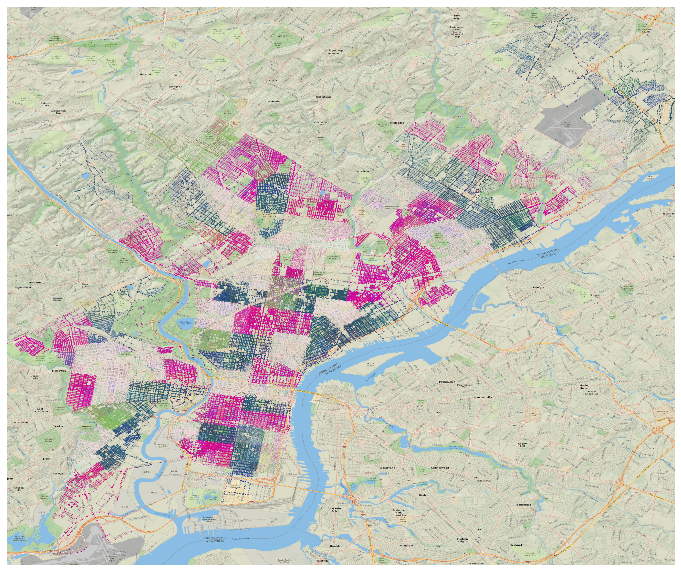

In [57]:
color = np.random.rand(df.Psa.unique().shape[0], 3)

plt.figure(figsize=(20,10))
m = Basemap(projection='mill', llcrnrlat=df.Lat.min(), urcrnrlat=df.Lat.max(), 
            llcrnrlon=df.Lon.min(), urcrnrlon=df.Lon.max(), resolution='c', epsg=4269)
m.arcgisimage(service="NatGeo_World_Map", xpixels=3000, verbose=True)
c = 0
for i in df.Psa.unique():
    x, y = m(tuple(df.Lon[(df.Lon.isnull()==False) & (df.Psa == i)]), \
         tuple(df.Lat[(df.Lat.isnull() == False) & (df.Psa == i)]))

    m.plot(x,y,'ro',markersize=1, alpha = 0.1, color = color[c] )
    c += 1

### Dc_Dist

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=-75.277728,39.869991,-74.957504,40.137895&bboxSR=4269&imageSR=4269&size=3000,2509&dpi=96&format=png32&f=image


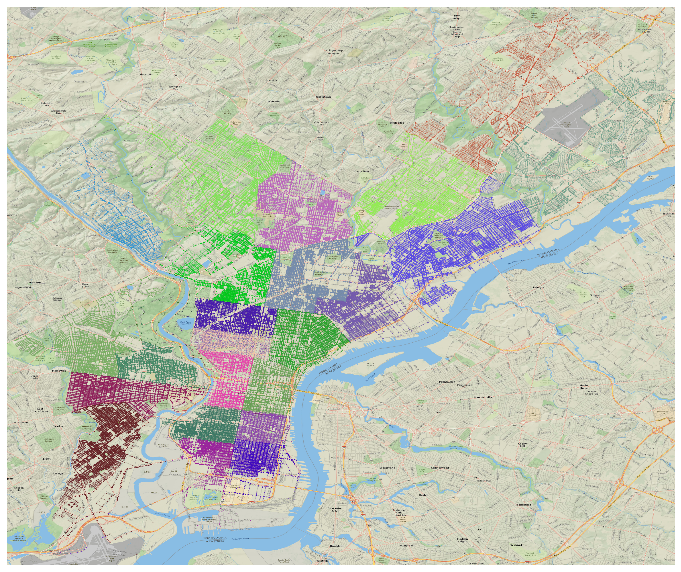

In [58]:
color = np.random.rand(df.Dc_Dist.unique().shape[0], 3)

plt.figure(figsize=(20,10))
m = Basemap(projection='mill', llcrnrlat=df.Lat.min(), urcrnrlat=df.Lat.max(), 
            llcrnrlon=df.Lon.min(), urcrnrlon=df.Lon.max(), resolution='c', epsg=4269)
m.arcgisimage(service="NatGeo_World_Map", xpixels=3000, verbose=True)
c = 0
for i in df.Dc_Dist.unique():
    x, y = m(tuple(df.Lon[(df.Lon.isnull()==False) & (df.Dc_Dist == i)]), \
         tuple(df.Lat[(df.Lat.isnull() == False) & (df.Dc_Dist == i)]))

    m.plot(x,y,'ro',markersize=1, alpha = 0.1, color = color[c] )
    c += 1

The map shows how divided Dc_Dist.

### Animation

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=-75.277728,39.869991,-74.957504,40.137895&bboxSR=4269&imageSR=4269&size=3000,2509&dpi=96&format=png32&f=image


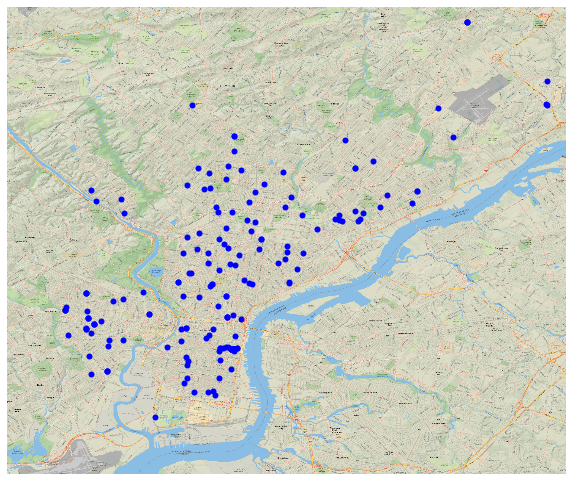

In [59]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,9))

m = Basemap(projection='mill', llcrnrlat=df.Lat.min(), urcrnrlat=df.Lat.max(),\
             llcrnrlon=df.Lon.min(), urcrnrlon=df.Lon.max(), resolution='c', epsg=4269)

x, y = m(df.Lon[(df.Lon.isnull()==False) ], \
        df.Lat[(df.Lat.isnull() == False)])

m.arcgisimage(service="NatGeo_World_Map", xpixels=3000, verbose=True)

a, b = m(df.Lon.min(), df.Lat.min())
graph = m.plot(a, b, 'ro', markersize=6, alpha = 1.0)[0]

all_hour = df.all_hour[(df.Lon.isnull()==False) ] 
def animate(i):
    lons = x[(all_hour < i+4) & (all_hour >= i) ]

    lats = y[(all_hour < i+4) & (all_hour >= i) ]
    graph.set_data(lons, lats)
    if (i % 24 >=23) | (i % 24 <= 7):
        graph.set_color('b')
    else:
        graph.set_color('r')
    return graph
anim = FuncAnimation(plt.gcf(), animate, repeat=True, frames=5000, interval=100)

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())